In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ocean = pd.read_csv("Data_Level5_BAH_OceanCleanup.csv")
ocean.head()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",12/22/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,3.0
1,87,"Fairfax County, VA, USA","Virginia, USA",United States,"38.87456, -77.24428","Land (beach, shoreline and inland)",12/24/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,2,10.0
2,92,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.04405","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,1,0,0,0,0,0,0,0,0,4.0
3,93,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,14.0
4,94,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,14.0


# Discussion of the data source

## Source Characteristics
Citizen Science initiative 

## Assumptions

In [3]:
ocean.columns

Index(['Cleanup ID', 'Zone', 'State', 'Country', 'GPS', 'Cleanup Type',
       'Cleanup Date', 'Group Name', 'Adults', 'Children', 'People', 'Pounds',
       'Miles', '# of bags', 'Cigarette Butts',
       'Food Wrappers (candy, chips, etc.)',
       'Take Out/Away Containers (Plastic)', 'Take Out/Away Containers (Foam)',
       'Bottle Caps (Plastic)', 'Bottle Caps (Metal)', 'Lids (Plastic)',
       'Straws, Stirrers', 'Forks, Knives, Spoons',
       'Beverage Bottles (Plastic)', 'Beverage Bottles (Glass)',
       'Beverage Cans', 'Grocery Bags (Plastic)', 'Other Plastic Bags',
       'Paper Bags', 'Cups, Plates (Paper)', 'Cups, Plates (Plastic)',
       'Cups, Plates (Foam)', 'Fishing Buoys, Pots & Traps',
       'Fishing Net & Pieces', 'Fishing Line (1 yard/meter = 1 piece)',
       'Rope (1 yard/meter = 1 piece)', 'Fishing Gear (Clean Swell)',
       '6-Pack Holders', 'Other Plastic/Foam Packaging',
       'Other Plastic Bottles (oil, bleach, etc.)', 'Strapping Bands',
       'Toba

Cleaning up Data:
1. ID 31449 - Allegheny River Cleanup -> Fat-fingered an extra zero, should be 26250 pounds.
2. ID

# Intensity of garbage collection over time
Dataset spans from end 2014 to late 2019. <br>
Method will be to sum pounds/distance/participants in each month and plot it accordingly.

In [4]:
poundsMonths = dict() 
poundsYears = dict() 

lastYear = 2019
firstYear = 2013


# for y in range(2014,2020):
#     for m in range(1,13):

import datetime
        
for index, row in ocean.iterrows():
    date = row['Cleanup Date']
    
    try:
        month = int(date.split('/')[0])
        day = int(date.split('/')[1])
        year = int(date.split('/')[2])
        
        dt = datetime.datetime(year,month,day)
        
        if int(year) > lastYear or int(year) < firstYear: # There are incorrect date inputs from years 2091, 1993 which had to be taken out.
            pass
        else:
            
            if str(year) in poundsYears.keys():
                poundsYears[str(year)] += row['Pounds']
            else:
                poundsYears[str(year)] = row['Pounds']
            
            monthYear = '/'.join(str(dt).split('-')[:2])
            
            if monthYear in poundsMonths.keys():
                poundsMonths[monthYear] += row['Pounds']
            else:
                poundsMonths[monthYear] = row['Pounds']
    except:
        pass

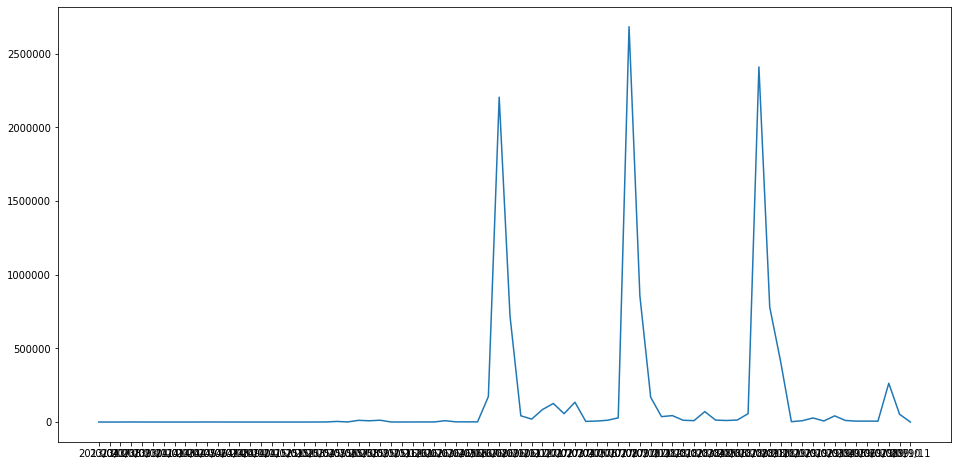

In [5]:
v = list()
k = list()

for key,value in sorted(poundsMonths.items(), key=lambda item: item[0]):
    k.append(key)
    v.append(value)
    

plt.figure(figsize=(16, 8))
plt.plot(k,v)

In [6]:
sorted(poundsYears.items(), key=lambda item: item[0])

[('2013', 599.81),
 ('2014', 741.77),
 ('2015', 38055.83),
 ('2016', 3173348.3000000063),
 ('2017', 4198267.592738005),
 ('2018', 3835460.855909096),
 ('2019', 430153.58900000114)]

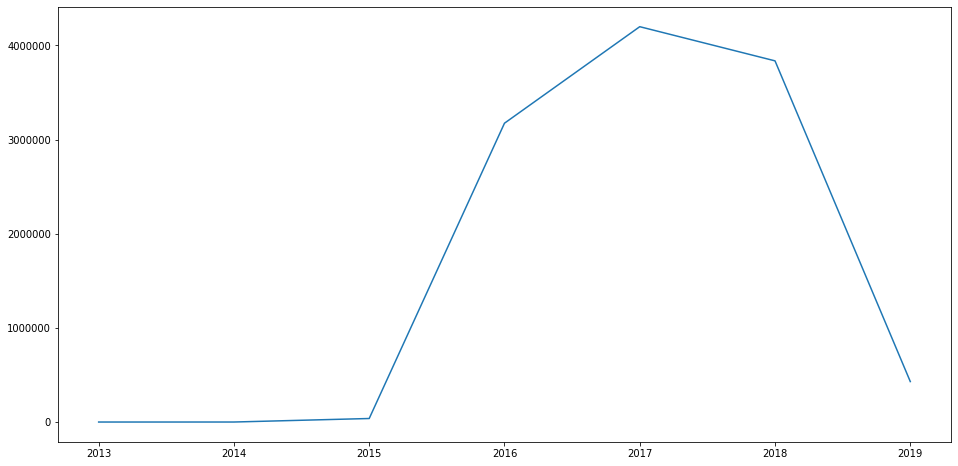

In [7]:
v = list()
k = list()

for key,value in sorted(poundsYears.items(), key=lambda item: item[0]):
    k.append(key)
    v.append(value)

plt.figure(figsize=(16, 8))
plt.plot(k,v)

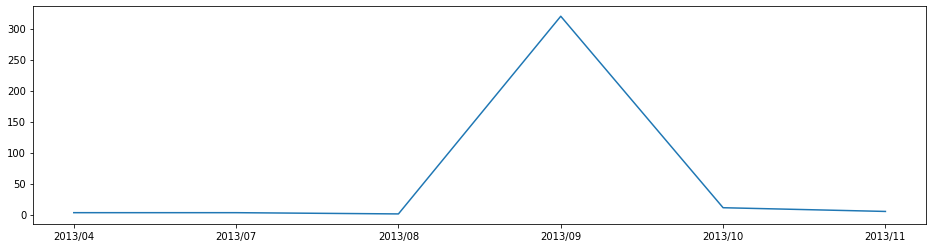

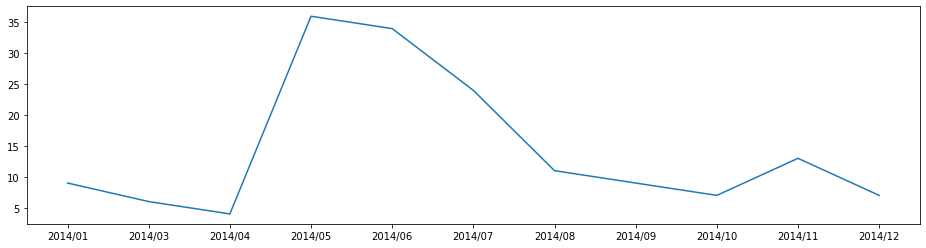

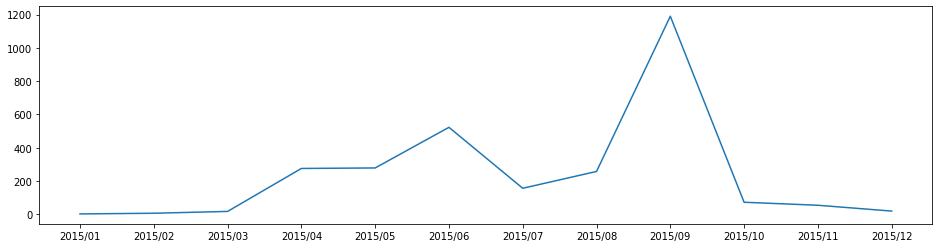

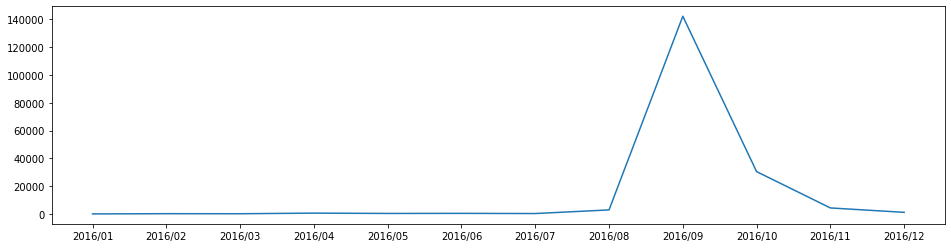

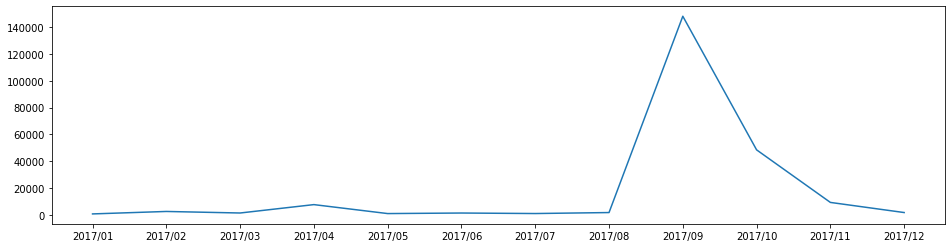

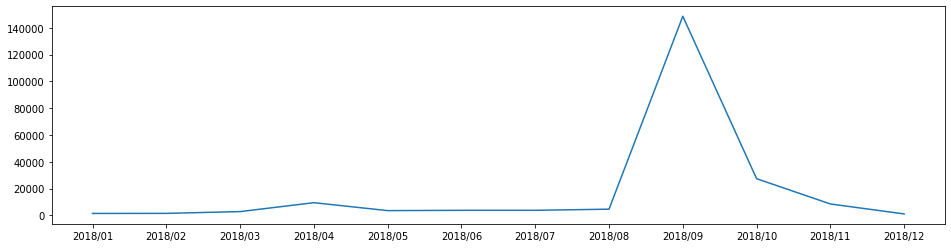

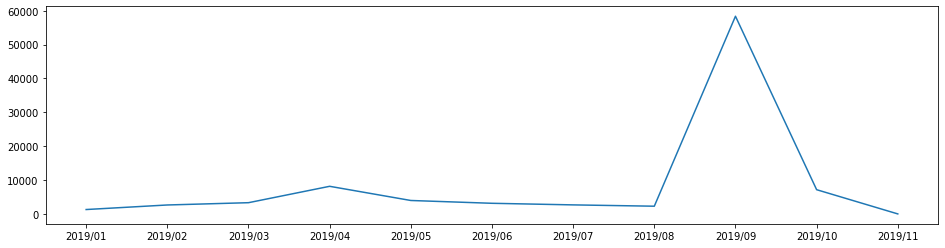

In [8]:
peopleMonths = dict() 
peopleYears = dict() 

lastYear = 2019
firstYear = 2013


# for y in range(2014,2020):
#     for m in range(1,13):

import datetime
        
for index, row in ocean.iterrows():
    date = row['Cleanup Date']
    
    try:
        month = int(date.split('/')[0])
        day = int(date.split('/')[1])
        year = int(date.split('/')[2])
        
        dt = datetime.datetime(year,month,day)
        
        if int(year) > lastYear or int(year) < firstYear: # There are incorrect date inputs from years 2091, 1993 which had to be taken out.
            pass
        else:
            
            if str(year) in peopleYears.keys():
                peopleYears[str(year)] += row['People']
            else:
                peopleYears[str(year)] = row['People']
            
            monthYear = '/'.join(str(dt).split('-')[:2])
            
            if monthYear in peopleMonths.keys():
                peopleMonths[monthYear] += row['People']
            else:
                peopleMonths[monthYear] = row['People']
    except:
        pass

v = list()
k = list()

for key,value in sorted(peopleMonths.items(), key=lambda item: item[0]):
    k.append(key)
    v.append(value)

plt.figure(figsize=(16, 4))
plt.plot(k[:6],v[:6])

plt.figure(figsize=(16, 4))
plt.plot(k[6:17],v[6:17])

plt.figure(figsize=(16, 4))
plt.plot(k[17:29],v[17:29])

plt.figure(figsize=(16, 4))
plt.plot(k[29:41],v[29:41])

plt.figure(figsize=(16, 4))
plt.plot(k[41:53],v[41:53])

plt.figure(figsize=(16, 4))
plt.plot(k[53:65],v[53:65])

plt.figure(figsize=(16, 4))
plt.plot(k[65:],v[65:])

In [9]:
def plotOverTime(variable,inYears=False):
    
    variableMonths = dict() 
    variableYears = dict() 

    lastYear = 2019
    firstYear = 2013

    for index, row in ocean.iterrows():
        date = row['Cleanup Date']

        try:
            month = int(date.split('/')[0])
            day = int(date.split('/')[1])
            year = int(date.split('/')[2])

            dt = datetime.datetime(year,month,day)

            if int(year) > lastYear or int(year) < firstYear: # There are incorrect date inputs from years 2091, 1993 which had to be taken out.
                pass
            else:

                if str(year) in variableYears.keys():
                    variableYears[str(year)] += row[variable]
                else:
                    variableYears[str(year)] = row[variable]

                monthYear = '/'.join(str(dt).split('-')[:2])

                if monthYear in variableMonths.keys():
                    variableMonths[monthYear] += row[variable]
                else:
                    variableMonths[monthYear] = row[variable]
        except:
            pass

    v = list()
    k = list()

    if inYears:
        for key,value in sorted(variableYears.items(), key=lambda item: item[0]):
            k.append(key)
            v.append(value)

        plt.figure(figsize=(16, 6))
        plt.plot(k,v)
        
    else:
    
        for key,value in sorted(variableMonths.items(), key=lambda item: item[0]):
            k.append(key)
            v.append(value)

        plt.figure(figsize=(16, 4))
        plt.plot(k[:6],v[:6])

        plt.figure(figsize=(16, 4))
        plt.plot(k[6:17],v[6:17])

        plt.figure(figsize=(16, 4))
        plt.plot(k[17:29],v[17:29])

        plt.figure(figsize=(16, 4))
        plt.plot(k[29:41],v[29:41])

        plt.figure(figsize=(16, 4))
        plt.plot(k[41:53],v[41:53])

        plt.figure(figsize=(16, 4))
        plt.plot(k[53:65],v[53:65])

        plt.figure(figsize=(16, 4))
        plt.plot(k[65:],v[65:])

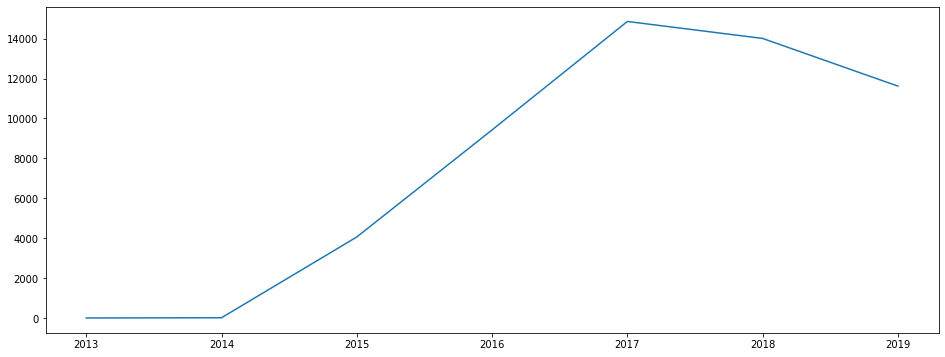

In [10]:
plotOverTime('Miles',inYears=True)

In [11]:
#Peak months: ID 25,37,49,61,73 All Septembers

for i in [25,37,49,61,73]:
    print(k[i],v[i])

2015/09 1190.0
2016/09 142263.0
2017/09 148121.0
2018/09 148684.0
2019/09 58384.0


In [12]:
#for i in k:
#   print(i,k.index(i))

#2013: 0-5
#2014: 6-16
#2015: 17-28
#2016: 29-40
#2017: 41-52
#2018: 53-64
#2019: 65-75


(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        7.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 5.000e+00, 2.000e+01, 1.600e+01, 1.560e+02,
        1.500e+02, 9.200e+01, 9.700e+01, 2.060e+02, 3.500e+01, 2.100e+01,
        1.900e+01, 1.230e+02, 6.000e+01, 4.500e+01, 1.400e+02, 2.820e+02,
        2.810e+02, 2.480e+02, 3.678e+03, 8.230e+02, 3.080e+02, 1.800e+02,
        2.080e+02, 2.490e+02, 2.620e+02, 3.630e+02, 4.150e+02, 5.850e+02,
        3.710e+02, 5.620e+02, 4.662e+03, 1.001e+03, 5.240e+02, 3.410e+02,
        4.260e+02, 4.530e+02, 7.940e+02, 7.290e+02, 8.120e+02, 9.740e+02,
        6.850e+02, 4.642e+03, 8.030e+02, 3.640e+02, 1.720e+02, 3.630e+02,
        4.500e+02, 7.230e+02, 1.302e+03, 8.310e+02, 7.660e+02, 8.560e+02,
        7.080e+02, 4.036e+03, 2.810e+02]),
 array([734987.        , 735018.94666667, 735050.89333333, 735082.84 

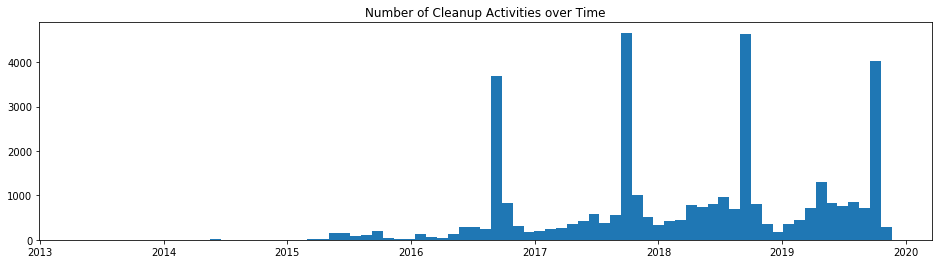

In [19]:
dates = []

for index, row in ocean.iterrows():
    date = row['Cleanup Date']

    try:
        month = int(date.split('/')[0])
        day = int(date.split('/')[1])
        year = int(date.split('/')[2])

        dt = datetime.datetime(year,month,day)
        
        if int(year) > lastYear or int(year) < firstYear: # There are incorrect date inputs from years 2091, 1993 which had to be taken out.
            pass  
        else:
            dates.append(dt)
    except:
        pass

plt.figure(figsize=(16, 4))
plt.title('Number of Cleanup Activities over Time')
plt.hist(dates,75)

### Garbage density per area of cleanup location
First looking at finding average weight of each item type as suggested by problem statement document.

In [13]:
trashItems = ocean[ocean.columns[14:-1]].to_numpy()
pounds = ocean[['Pounds']].to_numpy()
# np.linalg.solve(trashItems,pounds)

Not feasible since each variable does not have a consistent values across different entries/users
For deriving garbage density per area, finding the average weight for each item may not be that valuable i.e. there are alternative ways of getting it

In [11]:
distances = pounds = ocean[['Miles']].to_numpy()